In [1]:
import numpy as np
import os
import time
import matplotlib.pyplot as plt
import random
import torch
import torchvision.transforms as transforms
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
import torch.nn as nn
from torchsummary import summary
from torch.cuda.amp import GradScaler
from torch.optim.lr_scheduler import ReduceLROnPlateau

now = time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(time.time()))
print("import OK at ", now)
data_path = r"C:\Users\jiant\Desktop\data\motion_controller\IMU&ShoePad"
class_name = ["forward", "stand"]

# IMU 300 Hz
# shoePad 100 Hz

import OK at  2022-09-26 16:12:02


vis data with random start index (plot can vary each run) =  115


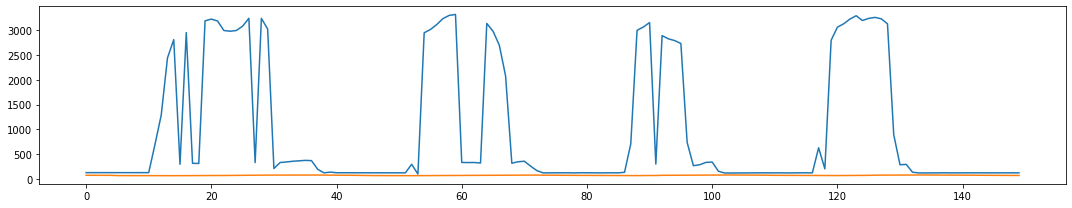

In [3]:
# vis data
sample_data_class_0 = os.listdir(os.path.join(data_path, class_name[0]))[0]
sample_data_class_1 = os.listdir(os.path.join(data_path, class_name[0]))[0]
sample_data_class_2 = os.listdir(os.path.join(data_path, class_name[0]))[0]

plt.rcParams['figure.figsize'] = (15,3)  # 单位是inches
fig, axs = plt.subplots(1, 1)

random_start = random.randint(0, 200)
print("vis data with random start index (plot can vary each run) = ", random_start)

with open(os.path.join(os.path.join(data_path, class_name[0]), sample_data_class_0)) as f:
    logs = f.read().split('\n')
    f1 = [int(i.split(",")[0]) for i in logs if i != '']
    f2 = [int(i.split(",")[1]) for i in logs if i != '']
    f3 = [int(i.split(",")[2]) for i in logs if i != '']
    f4 = [int(i.split(",")[3]) for i in logs if i != '']
    f5 = [int(i.split(",")[4]) for i in logs if i != '']
    f6 = [int(i.split(",")[5]) for i in logs if i != '']
    f7 = [int(i.split(",")[6]) for i in logs if i != '']
    f8 = [int(i.split(",")[7]) for i in logs if i != '']
    f9 = [float(i.split(",")[8]) for i in logs if i != '']  # IMU data , 12 dim
    f10 = [float(i.split(",")[9]) for i in logs if i != '']
    f11 = [float(i.split(",")[10]) for i in logs if i != '']
    f12 = [float(i.split(",")[11]) for i in logs if i != '']
    f13 = [float(i.split(",")[12]) for i in logs if i != '']
    f14 = [float(i.split(",")[13]) for i in logs if i != '']
    f15 = [float(i.split(",")[14]) for i in logs if i != '']
    f16 = [float(i.split(",")[15]) for i in logs if i != '']
    f17 = [float(i.split(",")[16]) for i in logs if i != '']
    f18 = [float(i.split(",")[17]) for i in logs if i != '']
    f19 = [float(i.split(",")[18]) for i in logs if i != '']
    f20 = [float(i.split(",")[19]) for i in logs if i != '']
# axs.plot(f1[random_start:random_start + 500])
# axs.plot(f2[random_start:random_start + 500])
# axs.plot(f3[random_start:random_start + 500])
axs.plot(f4[random_start:random_start + 150])
# axs.plot(f5[random_start:random_start + 500])
# axs.plot(f6[random_start:random_start + 500])
# axs.plot(f7[random_start:random_start + 500])
# axs.plot(f8[random_start:random_start + 500])
# axs.plot(f9[random_start:random_start + 500])  # IMU data , 12 dim
# axs.plot(f10[random_start:random_start + 500])
# axs.plot(f11[random_start:random_start + 500])
# axs.plot(f12[random_start:random_start + 500])
# axs.plot(f13[random_start:random_start + 500])
# axs.plot(f14[random_start:random_start + 500])
# axs.plot(f15[random_start:random_start + 500])
# axs.plot(f16[random_start:random_start + 500])
axs.plot(f17[random_start:random_start + 150])
# axs.plot(f18[random_start:random_start + 500])
# axs.plot(f19[random_start:random_start + 500])
# axs.plot(f20[random_start:random_start + 500])

fig.tight_layout()
# plt.show()

vis data with random start index (plot can vary each run) =  135


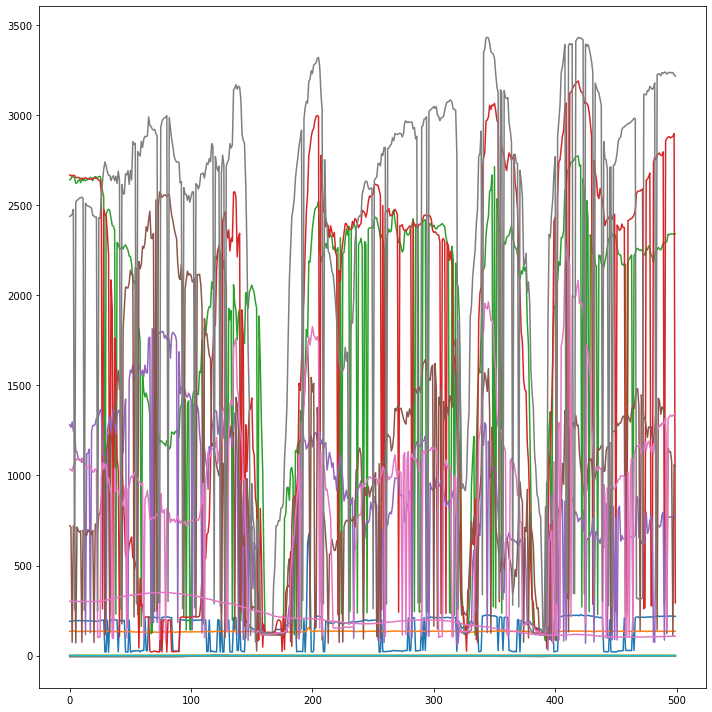

In [85]:
# vis data
sample_data_class_0 = os.listdir(os.path.join(data_path, class_name[1]))[0]
sample_data_class_1 = os.listdir(os.path.join(data_path, class_name[1]))[0]
sample_data_class_2 = os.listdir(os.path.join(data_path, class_name[1]))[0]

plt.rcParams['figure.figsize'] = (10.0, 10.0)  # 单位是inches
fig, axs = plt.subplots(1, 1)

random_start = random.randint(0, 200)
print("vis data with random start index (plot can vary each run) = ", random_start)

with open(os.path.join(os.path.join(data_path, class_name[1]), sample_data_class_0)) as f:
    logs = f.read().split('\n')
    f1 = [int(i.split(",")[0]) for i in logs if i != '']
    f2 = [int(i.split(",")[1]) for i in logs if i != '']
    f3 = [int(i.split(",")[2]) for i in logs if i != '']
    f4 = [int(i.split(",")[3]) for i in logs if i != '']
    f5 = [int(i.split(",")[4]) for i in logs if i != '']
    f6 = [int(i.split(",")[5]) for i in logs if i != '']
    f7 = [int(i.split(",")[6]) for i in logs if i != '']
    f8 = [int(i.split(",")[7]) for i in logs if i != '']
    f9 = [float(i.split(",")[8]) for i in logs if i != '']  # IMU data , 12 dim
    f10 = [float(i.split(",")[9]) for i in logs if i != '']
    f11 = [float(i.split(",")[10]) for i in logs if i != '']
    f12 = [float(i.split(",")[11]) for i in logs if i != '']
    f13 = [float(i.split(",")[12]) for i in logs if i != '']
    f14 = [float(i.split(",")[13]) for i in logs if i != '']
    f15 = [float(i.split(",")[14]) for i in logs if i != '']
    f16 = [float(i.split(",")[15]) for i in logs if i != '']
    f17 = [float(i.split(",")[16]) for i in logs if i != '']
    f18 = [float(i.split(",")[17]) for i in logs if i != '']
    f19 = [float(i.split(",")[18]) for i in logs if i != '']
    f20 = [float(i.split(",")[19]) for i in logs if i != '']
axs.plot(f1[random_start:random_start + 500])
axs.plot(f2[random_start:random_start + 500])
axs.plot(f3[random_start:random_start + 500])
axs.plot(f4[random_start:random_start + 500])
axs.plot(f5[random_start:random_start + 500])
axs.plot(f6[random_start:random_start + 500])
axs.plot(f7[random_start:random_start + 500])
axs.plot(f8[random_start:random_start + 500])
axs.plot(f9[random_start:random_start + 500])  # IMU data , 12 dim
axs.plot(f10[random_start:random_start + 500])
axs.plot(f11[random_start:random_start + 500])
axs.plot(f12[random_start:random_start + 500])
axs.plot(f13[random_start:random_start + 500])
axs.plot(f14[random_start:random_start + 500])
axs.plot(f15[random_start:random_start + 500])
axs.plot(f16[random_start:random_start + 500])
axs.plot(f17[random_start:random_start + 500])
axs.plot(f18[random_start:random_start + 500])
axs.plot(f19[random_start:random_start + 500])
axs.plot(f20[random_start:random_start + 500])

fig.tight_layout()
# plt.show()

In [86]:
# build dataset
# 50 Hz 下,实测采集1s数据约有30个点，故取30为数据长度
# sensor dim = 8+12=20 , 数据scale区别很大 需要归一化

data_length = 30  #
random_lag_min = 0
random_lag_max = 30
repeat_times = 1  # 每组数据重复随机采样次数
# random_lag = random.randint(0, 60)

In [87]:
data_class_0 = []
files_data_class = os.listdir(os.path.join(data_path, class_name[0]))
current_index = 0
for file in files_data_class:
    with open(os.path.join(os.path.join(data_path, class_name[0]), file)) as f:
        logs = f.read().split('\n')
        f1 = [int(i.split(",")[0]) for i in logs if i != '']
        f2 = [int(i.split(",")[1]) for i in logs if i != '']
        f3 = [int(i.split(",")[2]) for i in logs if i != '']
        f4 = [int(i.split(",")[3]) for i in logs if i != '']
        f5 = [int(i.split(",")[4]) for i in logs if i != '']
        f6 = [int(i.split(",")[5]) for i in logs if i != '']
        f7 = [int(i.split(",")[6]) for i in logs if i != '']
        f8 = [int(i.split(",")[7]) for i in logs if i != '']
        f9 = [float(i.split(",")[8]) for i in logs if i != '']  # IMU data , 12 dim
        f10 = [float(i.split(",")[9]) for i in logs if i != '']
        f11 = [float(i.split(",")[10]) for i in logs if i != '']
        f12 = [float(i.split(",")[11]) for i in logs if i != '']
        f13 = [float(i.split(",")[12]) for i in logs if i != '']
        f14 = [float(i.split(",")[13]) for i in logs if i != '']
        f15 = [float(i.split(",")[14]) for i in logs if i != '']
        f16 = [float(i.split(",")[15]) for i in logs if i != '']
        f17 = [float(i.split(",")[16]) for i in logs if i != '']
        f18 = [float(i.split(",")[17]) for i in logs if i != '']
        f19 = [float(i.split(",")[18]) for i in logs if i != '']
        f20 = [float(i.split(",")[19]) for i in logs if i != '']
    i_data_class = np.vstack([f1, f2, f3, f4, f5, f6, f7, f8, f9, f10,
                              f11, f12, f13, f14, f15, f16, f17, f18, f19, f20])  # shape = (8+12)*N
    print("loading file :", file)
    # print(i_data_class)
    print(i_data_class.shape)
    print(i_data_class.shape[1])
    for r_i in range(repeat_times):
        current_index = 0  # 重置
        i_max_loop = i_data_class.shape[1] // data_length
        for i in range(i_max_loop):
            random_lag = random.randint(random_lag_min, random_lag_max)  # 给一个随机lag,模拟推理阶段的随机取数
            current_index = current_index + random_lag
            tmp_start_index = current_index
            tmp_end_index = current_index + data_length
            current_index = tmp_end_index
            if tmp_end_index < i_data_class.shape[1]:
                print(f"append with {tmp_start_index} to {tmp_end_index}")
                data_class_0.append(i_data_class[:, tmp_start_index:tmp_end_index])

print("............检查数据准确性............")
print(f"理论构建的classes 的数据总量 约等于 txt文件数*每个文件行数/data_length/(mean(random_lag_min,random_lag_max))")
print(f"实际构建的classes 的数据总量 = {len(data_class_0)},")
print(f"以下是第1个数据，,请核对txt检查")
print(data_class_0[0])
print(f"以下是第2个数据，,请核对txt检查")
print(data_class_0[1])

loading file : 0826_f_1.txt
(20, 5000)
5000
append with 19 to 49
append with 57 to 87
append with 94 to 124
append with 151 to 181
append with 200 to 230
append with 251 to 281
append with 307 to 337
append with 356 to 386
append with 403 to 433
append with 463 to 493
append with 502 to 532
append with 557 to 587
append with 612 to 642
append with 655 to 685
append with 710 to 740
append with 743 to 773
append with 785 to 815
append with 845 to 875
append with 894 to 924
append with 949 to 979
append with 980 to 1010
append with 1013 to 1043
append with 1061 to 1091
append with 1100 to 1130
append with 1135 to 1165
append with 1180 to 1210
append with 1222 to 1252
append with 1278 to 1308
append with 1325 to 1355
append with 1366 to 1396
append with 1419 to 1449
append with 1478 to 1508
append with 1531 to 1561
append with 1583 to 1613
append with 1626 to 1656
append with 1658 to 1688
append with 1709 to 1739
append with 1756 to 1786
append with 1796 to 1826
append with 1851 to 1881
ap

In [88]:
data_class_1 = []
files_data_class = os.listdir(os.path.join(data_path, class_name[1]))
current_index = 0
for file in files_data_class:
    with open(os.path.join(os.path.join(data_path, class_name[1]), file)) as f:
        logs = f.read().split('\n')
        f1 = [int(i.split(",")[0]) for i in logs if i != '']
        f2 = [int(i.split(",")[1]) for i in logs if i != '']
        f3 = [int(i.split(",")[2]) for i in logs if i != '']
        f4 = [int(i.split(",")[3]) for i in logs if i != '']
        f5 = [int(i.split(",")[4]) for i in logs if i != '']
        f6 = [int(i.split(",")[5]) for i in logs if i != '']
        f7 = [int(i.split(",")[6]) for i in logs if i != '']
        f8 = [int(i.split(",")[7]) for i in logs if i != '']
        f9 = [float(i.split(",")[8]) for i in logs if i != '']  # IMU data , 12 dim
        f10 = [float(i.split(",")[9]) for i in logs if i != '']
        f11 = [float(i.split(",")[10]) for i in logs if i != '']
        f12 = [float(i.split(",")[11]) for i in logs if i != '']
        f13 = [float(i.split(",")[12]) for i in logs if i != '']
        f14 = [float(i.split(",")[13]) for i in logs if i != '']
        f15 = [float(i.split(",")[14]) for i in logs if i != '']
        f16 = [float(i.split(",")[15]) for i in logs if i != '']
        f17 = [float(i.split(",")[16]) for i in logs if i != '']
        f18 = [float(i.split(",")[17]) for i in logs if i != '']
        f19 = [float(i.split(",")[18]) for i in logs if i != '']
        f20 = [float(i.split(",")[19]) for i in logs if i != '']
    i_data_class = np.vstack([f1, f2, f3, f4, f5, f6, f7, f8, f9, f10,
                              f11, f12, f13, f14, f15, f16, f17, f18, f19, f20])  # shape = (8+12)*N
    print("loading file :", file)
    # print(i_data_class)
    print(i_data_class.shape)
    print(i_data_class.shape[1])
    for r_i in range(repeat_times):
        current_index = 0  # 重置
        i_max_loop = i_data_class.shape[1] // data_length
        for i in range(i_max_loop):
            random_lag = random.randint(random_lag_min, random_lag_max)  # 给一个随机lag,模拟推理阶段的随机取数
            current_index = current_index + random_lag
            tmp_start_index = current_index
            tmp_end_index = current_index + data_length
            current_index = tmp_end_index
            if tmp_end_index < i_data_class.shape[1]:
                print(f"append with {tmp_start_index} to {tmp_end_index}")
                data_class_1.append(i_data_class[:, tmp_start_index:tmp_end_index])

print("............检查数据准确性............")
print(f"理论构建的classes 的数据总量 约等于 txt文件数*每个文件行数/data_length/(mean(random_lag_min,random_lag_max))")
print(f"实际构建的classes 的数据总量 = {len(data_class_1)},")
print(f"以下是第1个数据，,请核对txt检查")
print(data_class_1[0])
print(f"以下是第2个数据，,请核对txt检查")
print(data_class_1[1])

loading file : 0826_stand_1.txt
(20, 5000)
5000
append with 17 to 47
append with 48 to 78
append with 83 to 113
append with 119 to 149
append with 174 to 204
append with 220 to 250
append with 277 to 307
append with 332 to 362
append with 371 to 401
append with 422 to 452
append with 468 to 498
append with 501 to 531
append with 549 to 579
append with 606 to 636
append with 651 to 681
append with 703 to 733
append with 733 to 763
append with 786 to 816
append with 836 to 866
append with 866 to 896
append with 907 to 937
append with 945 to 975
append with 987 to 1017
append with 1047 to 1077
append with 1087 to 1117
append with 1133 to 1163
append with 1185 to 1215
append with 1221 to 1251
append with 1264 to 1294
append with 1324 to 1354
append with 1371 to 1401
append with 1422 to 1452
append with 1452 to 1482
append with 1497 to 1527
append with 1550 to 1580
append with 1599 to 1629
append with 1659 to 1689
append with 1696 to 1726
append with 1756 to 1786
append with 1789 to 1819
ap

In [89]:
# data_class_2 = []
# files_data_class = os.listdir(os.path.join(data_path, class_name[2]))
# current_index = 0
# for file in files_data_class:
#     with open(os.path.join(os.path.join(data_path, class_name[2]), file)) as f:
#         logs = f.read().split('\n')
#         f1 = [int(i.split(",")[0]) for i in logs if i != '']
#         f2 = [int(i.split(",")[1]) for i in logs if i != '']
#         f3 = [int(i.split(",")[2]) for i in logs if i != '']
#         f4 = [int(i.split(",")[3]) for i in logs if i != '']
#         f5 = [int(i.split(",")[4]) for i in logs if i != '']
#         f6 = [int(i.split(",")[5]) for i in logs if i != '']
#         f7 = [int(i.split(",")[6]) for i in logs if i != '']
#         f8 = [int(i.split(",")[7]) for i in logs if i != '']
#         f9 = [float(i.split(",")[8]) for i in logs if i != '']  # IMU data , 12 dim
#         f10 = [float(i.split(",")[9]) for i in logs if i != '']
#         f11 = [float(i.split(",")[10]) for i in logs if i != '']
#         f12 = [float(i.split(",")[11]) for i in logs if i != '']
#         f13 = [float(i.split(",")[12]) for i in logs if i != '']
#         f14 = [float(i.split(",")[13]) for i in logs if i != '']
#         f15 = [float(i.split(",")[14]) for i in logs if i != '']
#         f16 = [float(i.split(",")[15]) for i in logs if i != '']
#         f17 = [float(i.split(",")[16]) for i in logs if i != '']
#         f18 = [float(i.split(",")[17]) for i in logs if i != '']
#         f19 = [float(i.split(",")[18]) for i in logs if i != '']
#         f20 = [float(i.split(",")[19]) for i in logs if i != '']
#     i_data_class = np.vstack([f1, f2, f3, f4, f5, f6, f7, f8, f9, f10,
#                               f11, f12, f13, f14, f15, f16, f17, f18, f19, f20])  # shape = (8+12)*N
#     print("loading file :", file)
#     # print(i_data_class)
#     print(i_data_class.shape)
#     print(i_data_class.shape[1])
#     for r_i in range(repeat_times):
#         current_index = 0  # 重置
#         i_max_loop = i_data_class.shape[1] // data_length
#         for i in range(i_max_loop):
#             random_lag = random.randint(random_lag_min, random_lag_max)  # 给一个随机lag,模拟推理阶段的随机取数
#             current_index = current_index + random_lag
#             tmp_start_index = current_index
#             tmp_end_index = current_index + data_length
#             current_index = tmp_end_index
#             if tmp_end_index < i_data_class.shape[1]:
#                 print(f"append with {tmp_start_index} to {tmp_end_index}")
#                 data_class_2.append(i_data_class[:, tmp_start_index:tmp_end_index])
#
# print("............检查数据准确性............")
# print(f"理论构建的classes 的数据总量 约等于 txt文件数*每个文件行数/data_length/(mean(random_lag_min,random_lag_max))")
# print(f"实际构建的classes 的数据总量 = {len(data_class_2)},")
# print(f"以下是第1个数据，,请核对txt检查")
# print(data_class_2[0])
# print(f"以下是第2个数据，,请核对txt检查")
# print(data_class_2[1])

In [90]:
label_class_0 = [class_name[0] for i in range(len(data_class_0))]  # class name
label_class_1 = [class_name[1] for i in range(len(data_class_1))]
# label_class_2 = [class_name[2] for i in range(len(data_class_2))]
# all_data = data_class_0 + data_class_1 + data_class_2
# all_label = label_class_0 + label_class_1 + label_class_2
all_data = data_class_0 + data_class_1
all_label = label_class_0 + label_class_1

if not len(all_data) == len(all_label):
    raise RuntimeError
print(f"dataset 组合完毕,总数据量为{len(all_data)}")
print(f"dataset 一个例子:shape of model input data (without extend & the batch dim) is {all_data[0].shape}")
# print(f",三个类别的数据量分别为{len(data_class_0)},{len(data_class_1)},{len(data_class_2)}")
print(f",2个类别的数据量分别为{len(data_class_0)},{len(data_class_1)}")

dataset 组合完毕,总数据量为772
dataset 一个例子:shape of model input data (without extend & the batch dim) is (20, 30)
,2个类别的数据量分别为329,443


In [91]:
# 将每个传感器的数据标准化，使其均值为零，标准差为一。
# 我们通过训练数据集的参数对测试数据集进行规范化
# todo

In [92]:
def random_true(prob):
    p = ([prob, 1 - prob])
    return np.random.choice([True, False], p=p)


class CustomDataset(Dataset):
    def __init__(self, images_, labels_, transform=None):
        self.images = images_
        self.labels = labels_
        self.transform = transform

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()
        img = self.images[idx]
        if self.transform:
            img = self.transform(img)
        label = torch.tensor(self.labels[idx]).type(torch.long)
        return img, label  # img / label shall be tensor or numpy


data_train = []
label_train = []
data_val = []
label_val = []
data_test = []
label_test = []
for i in range(len(all_label)):
    if random_true(0.6):
        data_train.append(all_data[i])
        label_train.append(all_label[i])
    else:
        if random_true(0.5):
            data_val.append(all_data[i])
            label_val.append(all_label[i])
        else:
            data_test.append(all_data[i])
            label_test.append(all_label[i])

# label transfer 2 int
label_train = [class_name.index(i) for i in label_train]
label_val = [class_name.index(i) for i in label_val]
label_test = [class_name.index(i) for i in label_test]

# 8*10 ==> 1*8*10
test_transform = transforms.Compose([
    transforms.ToTensor()
])

train_transform = transforms.Compose([
    transforms.ToTensor()
])

print(f"tran val text split finished with length = {len(data_train)},{len(data_val)},{len(data_test)}")

train = CustomDataset(data_train, label_train, train_transform)
val = CustomDataset(data_val, label_val, test_transform)
test = CustomDataset(data_test, label_test, test_transform)

test_bs = 2
train_loader = DataLoader(train, batch_size=test_bs, shuffle=True)
val_loader = DataLoader(val, batch_size=test_bs, shuffle=True)
test_loader = DataLoader(test, batch_size=test_bs, shuffle=True)
print('========reading all img into memory done! ready to --fly--')

for j, (_inputs, _labels) in enumerate(train_loader):
    print(f"checking {j}th data")
    print(_labels.shape)
    print(_inputs.shape)
    print(_labels)
    print(_inputs)
    if j == 5:
        break

tran val text split finished with length = 485,144,143
========reading all img into memory done! ready to --fly--
checking 0th data
torch.Size([2])
torch.Size([2, 1, 20, 30])
tensor([1, 0])
tensor([[[[ 1.7100e+02,  1.7100e+02,  1.7400e+02,  ...,  1.8600e+02,
            1.8600e+02,  1.8700e+02],
          [ 1.2900e+02,  1.2800e+02,  1.2900e+02,  ...,  1.3000e+02,
            1.2900e+02,  1.3000e+02],
          [ 2.4360e+03,  2.4390e+03,  2.4570e+03,  ...,  2.3340e+03,
            2.3650e+03,  2.3730e+03],
          ...,
          [-6.3095e-01, -6.2241e-01, -6.0968e-01,  ..., -6.1296e-01,
           -6.2373e-01, -6.2570e-01],
          [ 1.0107e+00,  1.0041e+00,  9.9419e-01,  ...,  1.0102e+00,
            1.0137e+00,  1.0137e+00],
          [ 1.2367e-01,  1.1937e-01,  1.1937e-01,  ...,  1.1544e-01,
            1.1483e-01,  1.0770e-01]]],


        [[[ 2.2700e+02,  2.2700e+02,  2.2300e+02,  ...,  2.3400e+02,
            2.3000e+02,  2.3000e+02],
          [ 2.4200e+02,  2.9240e+03,  2.97

In [93]:
class V1_Backbone(nn.Module):
    def __init__(self):
        super(V1_Backbone, self).__init__()

        self.first_layers = nn.Sequential(
            nn.Conv2d(1, 50, kernel_size=(1, 5), stride=1, padding="valid"),
            nn.BatchNorm2d(50),
            nn.ReLU(),
            nn.Conv2d(50, 50, (1, 3), 1, padding="same"),
            nn.BatchNorm2d(50),
            nn.ReLU(),

            # nn.Linear(4608, 50),
            nn.MaxPool2d(1, 2),
            nn.Dropout(p=0.2),

            nn.Conv2d(50, 40, (1, 5), stride=1, padding="valid"),
            nn.ReLU(),
            # nn.BatchNorm2d(40),
            # nn.Linear(4608, 50),
            nn.MaxPool2d(1, 2),
            nn.Dropout(p=0.2),

            nn.Conv2d(40, 20, (1, 3), stride=1, padding="valid"),
            # nn.BatchNorm2d(40),
            nn.ReLU(),
            nn.Dropout(p=0.2),
        )

        self.sec_layers = nn.Sequential(
            nn.Linear(300, 150),
            nn.Dropout(p=0.4),
            nn.Linear(150, 60),
            nn.Dropout(p=0.4),
        )

    def forward(self, _input):
        x = self.first_layers(_input)
        x = x.view(x.size()[0], -1)
        x = self.sec_layers(x)
        return x


class V1_Net(V1_Backbone):
    def __init__(self):
        super().__init__()
        self.lin3 = nn.Linear(60, 2)

    def forward(self, inp):
        x = super().forward(inp)
        x = self.lin3(x)
        return x


device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print("summary of network...")
# params最后print出来要除以100万转换为M为单位（论文中常用的格式）
_net = V1_Net().to(device)
summary(_net, (1, 20, 30))

summary of network...
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 50, 20, 26]             300
       BatchNorm2d-2           [-1, 50, 20, 26]             100
              ReLU-3           [-1, 50, 20, 26]               0
            Conv2d-4           [-1, 50, 20, 26]           7,550
       BatchNorm2d-5           [-1, 50, 20, 26]             100
              ReLU-6           [-1, 50, 20, 26]               0
         MaxPool2d-7           [-1, 50, 10, 13]               0
           Dropout-8           [-1, 50, 10, 13]               0
            Conv2d-9            [-1, 40, 10, 9]          10,040
             ReLU-10            [-1, 40, 10, 9]               0
        MaxPool2d-11             [-1, 40, 5, 5]               0
          Dropout-12             [-1, 40, 5, 5]               0
           Conv2d-13             [-1, 20, 5, 3]           2,420
             ReLU

In [94]:
def train_CV(net, dataloader, criterion, optimizer, scaler, e):
    net = net.train()
    loss_tr, correct_count, n_samples = 0.0, 0.0, 0.0

    for i, data in enumerate(dataloader):
        inputs, labels = data
        inputs, labels = inputs.to(device, dtype=torch.float), labels.to(device)
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        scaler.scale(loss).backward()
        scaler.step(optimizer)
        scaler.update()
        optimizer.zero_grad()
        # calculate performance metrics
        loss_tr += loss.item()
        _, preds = torch.max(outputs.data, 1)
        correct_count += (preds == labels).sum().item()
        n_samples += labels.size(0)

    acc = 100 * correct_count / n_samples
    loss = loss_tr / n_samples
    #print(f"loss on train set at epoch {e} is {loss}")
    print(f"==>acc on train set at epoch {e} is {round(acc, 5)} %")
    return acc, loss


def val_CV(net, dataloader, criterion, e):
    net = net.eval()
    loss_tr, correct_count, n_samples = 0.0, 0.0, 0.0

    with torch.no_grad():
        for i, data in enumerate(dataloader):
            inputs, labels = data
            inputs, labels = inputs.to(device, dtype=torch.float), labels.to(device)
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            loss_tr += loss.item()
            _, preds = torch.max(outputs.data, 1)
            correct_count += (preds == labels).sum().item()
            n_samples += labels.size(0)

    acc = 100 * correct_count / n_samples
    loss = loss_tr / n_samples
    #print(f"loss on val set at epoch {e} is {loss}")
    print(f"====>acc on val set at epoch {e} is {round(acc, 5)} %")
    return acc, loss, e


def test_CV(net, dataloader, e):
    net = net.eval()
    loss_tr, correct_count, n_samples = 0.0, 0.0, 0.0
    with torch.no_grad():
        for i, data in enumerate(dataloader):
            inputs, labels = data
            inputs, labels = inputs.to(device, dtype=torch.float), labels.to(device)
            outputs = net(inputs)
            _, preds = torch.max(outputs.data, 1)
            correct_count += (preds == labels).sum().item()
            n_samples += labels.size(0)
    acc = 100 * correct_count / n_samples
    print(f"=========>acc on test set at epoch {e} is {round(acc, 5)} %")
    return acc


def save(net, path):
    checkpoint = {
        'params': net.state_dict()
    }
    # save checkpoint
    torch.save(checkpoint, path)


def start_train():
    model = V1_Net
    net = model().to(device)
    scaler = GradScaler()
    optimizer = torch.optim.SGD(net.parameters(), lr=0.001, momentum=0.9, nesterov=True, weight_decay=0.0001)
    scheduler = ReduceLROnPlateau(optimizer, mode='max', factor=0.75, patience=5, verbose=True)
    criterion = nn.CrossEntropyLoss()

    print('============================ training start ==================================')
    max_epoch = 200
    save_freq = 300  # if >max_epoch不会存 checkpoint

    best_acc = 0.0
    for epoch in range(max_epoch):
        _acc_tr, _loss_tr = train_CV(net, train_loader, criterion, optimizer, scaler, epoch)
        _acc_v, _loss_v, _ = val_CV(net, val_loader, criterion, epoch)
        scheduler.step(_acc_v)
        # save when _acc_v is better
        if _acc_v > best_acc and epoch >= 80:  # 节约时间,前几轮不存
            _acc_t = test_CV(net, test_loader, epoch)
            print(f'a better val acc found, so save check point, epoch is {epoch}')
            best_acc = _acc_v
            pkl_name = str(epoch) + "_best.pkl"
            path = os.path.join(r'../materials', pkl_name)
            torch.save(net, path)
        # save when at point
        if (epoch + 1) % save_freq == 0:
            print(f'just save check point at epoch {epoch}')
            pkl_name = str(epoch) + ".pkl"
            path = os.path.join(r'../materials', pkl_name)
            torch.save(net, path)


start_train()

============================ training start ==================================
==>acc on train set at epoch 0 is 60.0 %
====>acc on val set at epoch 0 is 53.47222 %
==>acc on train set at epoch 1 is 64.3299 %
====>acc on val set at epoch 1 is 73.61111 %
==>acc on train set at epoch 2 is 71.75258 %
====>acc on val set at epoch 2 is 71.52778 %
==>acc on train set at epoch 3 is 75.05155 %
====>acc on val set at epoch 3 is 72.22222 %
==>acc on train set at epoch 4 is 77.73196 %
====>acc on val set at epoch 4 is 87.5 %
==>acc on train set at epoch 5 is 82.26804 %
====>acc on val set at epoch 5 is 90.27778 %
==>acc on train set at epoch 6 is 84.53608 %
====>acc on val set at epoch 6 is 88.19444 %
==>acc on train set at epoch 7 is 86.39175 %
====>acc on val set at epoch 7 is 86.80556 %
==>acc on train set at epoch 8 is 87.21649 %
====>acc on val set at epoch 8 is 90.97222 %
==>acc on train set at epoch 9 is 89.48454 %
====>acc on val set at epoch 9 is 94.44444 %
==>acc on train set at epoch 1